In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')[:-2]
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN


In [3]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6729 non-null   object 
 1   Year             6729 non-null   object 
 2   Value            6729 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), object(2)
memory usage: 210.4+ KB


In [4]:
#gdp_df = pd.read_csv("../gdp_per_capita.csv", nrows=6727)

In [5]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


In [6]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6729 non-null   object 
 1   Year             6729 non-null   object 
 2   Value            6729 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), object(2)
memory usage: 210.4+ KB


In [8]:
gdp_df = gdp_df.drop(columns=['Value Footnotes'])
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6729 non-null   object 
 1   Year             6729 non-null   object 
 2   Value            6729 non-null   float64
dtypes: float64(1), object(2)
memory usage: 157.8+ KB


In [9]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   object 
 1   Year            6729 non-null   object 
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), object(2)
memory usage: 157.8+ KB


In [10]:
gdp_df.Year = gdp_df.Year.astype(int)
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   object 
 1   Year            6729 non-null   int64  
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


In [11]:
gdp_df.Year.max()

2018

In [12]:
gdp_df.Year.min()

1990

In [13]:
gdp_df.Year.value_counts()

2011    243
2012    241
2009    241
2010    241
2013    241
2015    240
2008    240
2014    240
2007    239
2016    239
2017    239
2005    238
2004    238
2002    238
2006    238
2003    238
2001    237
2000    236
1999    228
1998    227
2018    226
1997    226
1996    224
1995    224
1994    218
1993    215
1992    213
1991    211
1990    210
Name: Year, dtype: int64

In [14]:
gdp_df.Country.value_counts()

New Zealand                  29
Mali                         29
Canada                       29
The Bahamas                  29
Algeria                      29
                             ..
Nauru                        12
Sint Maarten (Dutch part)     9
Turks and Caicos Islands      8
South Sudan                   8
Djibouti                      1
Name: Country, Length: 243, dtype: int64

## 9. How many countries are represented in data set

In [15]:
gdp_df.Country.nunique()

243

In [16]:
gdp_df.groupby('Country')['Year'].nunique()

Country
Afghanistan            17
Albania                29
Algeria                29
Angola                 29
Antigua and Barbuda    29
                       ..
West Bank and Gaza     25
World                  29
Yemen                  29
Zambia                 29
Zimbabwe               29
Name: Year, Length: 243, dtype: int64

In [17]:
gdp_df.groupby('Year')['Country'].nunique()

Year
1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
Name: Country, dtype: int64

What countries are least represented in the data?  : Nauru, Sint Maarten, Turks & Caicos Islands, South Sudan, Djibouti are least represented. 

## 10. Create new dataframe by subsetting gdp_df to just the year 2014

In [18]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]
gdp_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 4 to 6704
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         240 non-null    object 
 1   Year            240 non-null    int64  
 2   GDP_Per_Capita  240 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.5+ KB


In [19]:
gdp_2014.head()

,Country,Year,GDP_Per_Capita
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555


In [20]:
gdp_2014.sample(5)

,Country,Year,GDP_Per_Capita
3174,Kyrgyz Republic,2014,3176.902804
4713,Panama,2014,20031.693436
736,Bulgaria,2014,16324.337479
4800,Peru,2014,11887.415150
513,Benin,2014,2001.052000


## 11. Use .describe() to find the summary statistics for GDP per capita in 2014

In [21]:
gdp_2014.describe()
gdp_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 4 to 6704
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         240 non-null    object 
 1   Year            240 non-null    int64  
 2   GDP_Per_Capita  240 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.5+ KB


## 12. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

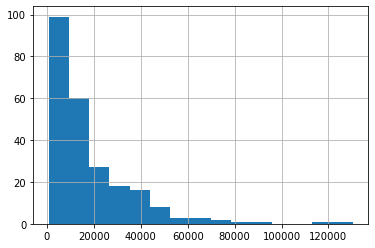

In [22]:
gdp_2014.GDP_Per_Capita.hist(bins = 15)

The shape of the distribution is right skewed.

## 13. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014


In [23]:
gdp_2014.sort_values('GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804
...,...,...,...
707,Brunei,2014,76448.593329
5316,Singapore,2014,81965.361071
3610,Luxembourg,2014,92349.186429
5003,Qatar,2014,116693.507701


## 14. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.


In [24]:
gdp_df[(gdp_df['Year']==1990) | (gdp_df['Year']==2017)].pivot_table(values='GDP_Per_Capita', index='Country', columns='Year')

Year,1990,2017
Country,,
Afghanistan,NaN,1758.465636
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
...,...,...
West Bank and Gaza,NaN,4651.723645
World,8966.014072,15527.280228
Yemen,3425.707169,2404.422370


In [25]:
gdp_pivoted = gdp_df[(gdp_df['Year']==1990) | (gdp_df['Year']==2017)].pivot_table(values='GDP_Per_Capita', index='Country', columns='Year').dropna()
gdp_pivoted

Year,1990,2017
Country,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104
...,...,...
Vietnam,1457.594613,6233.485045
World,8966.014072,15527.280228
Yemen,3425.707169,2404.422370


In [26]:
#gdp_pivoted = gdp_df.pivot_table(columns=['Year'], index=['Country'], values='GDP_Per_Capita')[[1990, 2017]].dropna()


In [27]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
gdp_pivoted

Year,1990,2017
Country,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104
Argentina,11372.823108,18945.144022
Armenia,3742.431024,8744.731368
Aruba,37140.024657,35861.828118
Australia,28669.059474,44781.322760


## 15. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

https://stackoverflow.com/questions/42100058/percentage-difference-between-any-two-columns-of-pandas-dataframe

In [28]:
gdp_pivoted['Percent_Change'] = gdp_pivoted.apply(lambda row: (row.iloc[1]-row.iloc[0])/row.iloc[0]*100, axis=1)

In [29]:
gdp_pivoted

Year,1990,2017,Percent_Change
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972
Argentina,11372.823108,18945.144022,66.582596
Armenia,3742.431024,8744.731368,133.664463
Aruba,37140.024657,35861.828118,-3.441561
Australia,28669.059474,44781.322760,56.200879


## 16. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [31]:
gdp_pivoted[gdp_pivoted['Percent_Change']< 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Aruba to Zimbabwe
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   1990            20 non-null     float64
 1   2017            20 non-null     float64
 2   Percent_Change  20 non-null     float64
dtypes: float64(3)
memory usage: 640.0+ bytes


In [32]:
gdp_pivoted.sample(10)

Year,1990,2017,Percent_Change
Country,,,
IDA blend,3176.379514,4894.125582,54.078742
"Macao SAR, China",40380.648949,105773.834483,161.941889
Sudan,1762.203432,4435.857095,151.722191
Madagascar,1928.012284,1648.373871,-14.503975
Tunisia,5608.331248,10950.027386,95.245732
Latin America & Caribbean,9949.032859,14452.161329,45.261972
Least developed countries: UN classification,1376.227449,2594.260585,88.505220
Antigua and Barbuda,17454.549799,22400.379562,28.335476
East Asia & Pacific (excluding high income),2222.407152,13544.178535,509.437318


## 17. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.

In [37]:
gdp_pivoted.sort_values(by='Percent_Change', ascending=False)

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1017.764136,22298.942144,2090.973464
China,1521.963868,15253.993071,902.257241
Myanmar,730.228038,5610.324700,668.297629
East Asia & Pacific (excluding high income),2222.407152,13544.178535,509.437318
East Asia & Pacific (IDA & IBRD),2246.661835,13686.880719,509.209651
Vietnam,1457.594613,6233.485045,327.655604
Bhutan,2259.568462,9042.907491,300.205068
Cabo Verde,1676.190288,6367.984878,279.908231
Lao PDR,1708.034226,6310.067080,269.434463


In [39]:
gdp_df[(gdp_df['Country'] == 'Equatorial Guinea')|(gdp_df['Country'] == 'China')]

,Country,Year,GDP_Per_Capita
1126,China,2018,16181.777716
1127,China,2017,15253.993071
1128,China,2016,14368.630801
1129,China,2015,13534.846237
1130,China,2014,12725.089099
1131,China,2013,11919.607104
1132,China,2012,11115.110675
1133,China,2011,10355.495713
1134,China,2010,9498.079744
1135,China,2009,8626.532479


In [ ]:
gdp_greatest_change = gdp_df.copy()
gdp_greatest_change = gdp_greatest_change[(gdp_greatest_change['Country'] == 'Equatorial Guinea')|(gdp_greatest_change['Country'] == 'China')]

In [41]:
china_eqguinea = gdp_df.copy()

In [42]:
china_eqguinea = china_eqguinea['Country'].isin(['China','Equatorial Guinea'])
china_eqguinea

0       False
1       False
2       False
3       False
4       False
        ...  
6724    False
6725    False
6726    False
6727    False
6728    False
Name: Country, Length: 6729, dtype: bool